# James Jones
## 11-30-2022

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Load in data
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## We have been asked to use our hypothesis testing skills to answer the following questions:

- ### Q1. Do smokers have higher insurance charges than non-smokers?
- ### Q2. Are men more likely to smoke than women?
- ### Q3. Do different regions have different charges, on average?

In [3]:
# As always, begin with some data cleaning
print(f'Duplicated values: {df.duplicated().sum()}')
print('\n')
print("Null values:")
print(df.isna().sum())
print('\n')
print('DF Info:')
print(df.info())

Duplicated values: 1


Null values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


DF Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
# Drop duplicate
df.drop_duplicates(inplace = True)

In [5]:
# Check smoker coulmn values
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [6]:
# Check sex colum values
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [7]:
# Check region column values
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [8]:
# Finally, check charges column values
df['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [9]:
# There are too many unique charges to view, so instead look at .describe()
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### All values we'll be assessing seem to be correct. Now we can move on to hypothesis testing
#### For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

### Q 1: Do smokers have higher insurance charges than non-smokers?
- #### Null Hypothesis:
    - There will be **no** difference between insurance charges for smokers and non-smokers
- #### Alternate Hypothesis:
    - There will be a statistical difference between insurance charges for smokers and non-smokers
- #### Alpha = 0.05
    
#### We will be using a 2 sample T-test

In [10]:
# Split data into 2 groups (smokers and non-smokers)
smoker_df = df.loc[df['smoker'] == 'yes'].copy()
non_smoker_df = df.loc[df['smoker'] == 'no'].copy()

# Display smoker_df.info() to show that the split was performed properly
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [11]:
# Display non_smoker_df.info() to display the split was performed properly
    # Will only do this for question 1 to ensure the code is correct
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1063 non-null   int64  
 1   sex       1063 non-null   object 
 2   bmi       1063 non-null   float64
 3   children  1063 non-null   int64  
 4   smoker    1063 non-null   object 
 5   region    1063 non-null   object 
 6   charges   1063 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.4+ KB


In [12]:
# Define features of interest
smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']

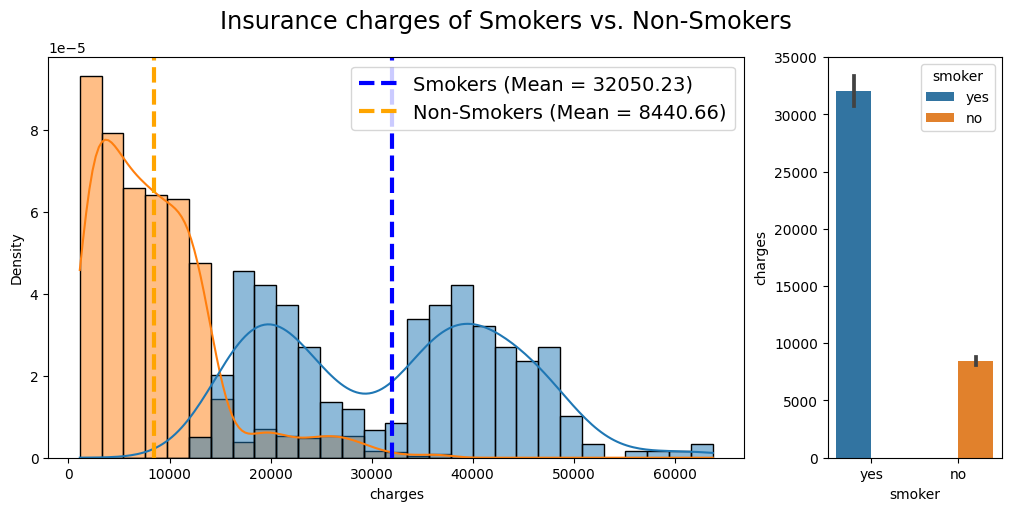

In [13]:
# Visualize comparison of two groups (unnecessary, but helpful step)
smoker_palette = {'smoker':'blue', "non_smoker":'orange'}

# Visualizing Sample means
fig, (ax, ax_bar) = plt.subplots(figsize = (10,5), ncols = 2, 
                                constrained_layout = True,
                                gridspec_kw = {'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data = df, x = 'charges', fill = True, hue = 'smoker',
                  kde = True, stat = 'density', common_norm = False, ax = ax)

ax.axvline(np.mean(smoker_charges), ls = '--', lw = 3, 
           label = f"Smokers (Mean = {np.mean(smoker_charges):.2f})",
           color = smoker_palette['smoker'])

ax.axvline(np.mean(non_smoker_charges), ls = '--', lw = 3, 
           label = f"Non-Smokers (Mean = {np.mean(non_smoker_charges):.2f})",
           color = smoker_palette['non_smoker'])

ax.legend(prop = {"size":14}, loc = 'upper right') # bbox_to_anchor = [1,1])

# Barplot
sns.barplot(data = df, x = 'smoker', y = 'charges', ax = ax_bar,
            hue = 'smoker')
fig.suptitle('Insurance charges of Smokers vs. Non-Smokers', fontsize = 'xx-large');

In [14]:
# Check for outliers separately in both groups
zscores_yes = stats.zscore(smoker_charges)
outliers = abs(zscores_yes) > 3
np.sum(outliers)

0

In [15]:
# Check non_smoker z-scores
zscores_no = stats.zscore(non_smoker_charges)
outliers_2 = abs(zscores_no) > 3
np.sum(outliers_2)

24

In [16]:
# There are 24 outliers in our non_smoker group. Let's remove them
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [17]:
# Check for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [18]:
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

### Both normality tests resulted i a p-value far below 0.05, indicting they are NOT normally distributed
- We will continue with our tests, however, because the group sizes are larger than 15

In [19]:
# Use Levene test to check for equal variance
result_levene = stats.levene(smoker_charges, non_smoker_charges)
result_levene

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

### Our groups do NOT have equal variance 
- Therefore we will include "equal_var = False" in our T-Test

In [20]:
# Independent t-test with equal var set to False
result_ttest = stats.ttest_ind(smoker_charges, non_smoker_charges,
                               equal_var = False)
result_ttest

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

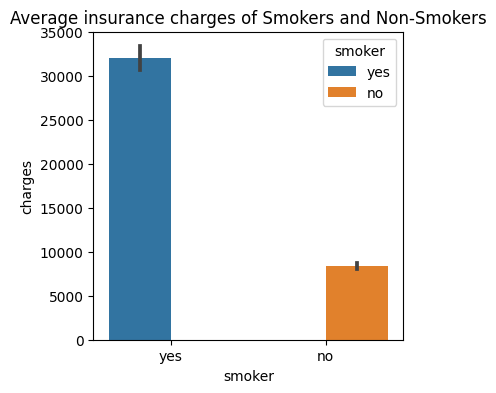

In [21]:
# Quick barplot to see diference in average insurance charges between Smokers and Non_Smokers
fig, ax = plt.subplots(figsize = (4, 4))
sns.barplot(data = df, x = 'smoker', y = 'charges', hue = 'smoker')
plt.title('Average insurance charges of Smokers and Non-Smokers');

## Q1 Hypothesis Test Result
- ### Our p-value is less than 0.05 (< 0.05), therefore we will reject the null hypothesis that there is no difference between insurance charges for smokers and non-smokers

...................................................................................................................................................................................................................................................

### Q2. Are men more likely to smoke than women?
- #### Null Hypothesis:
    - There is no difference in the smoking rate of men and women
- #### Alternate Hypothesis:
    - There will be a statistical difference between the smoking rate of men and women
- #### Alpha = 0.05
    
#### We will be using a Chi-Squared Test

In [22]:
# In order to use a Chi-Squared, we need to generate a Contingency Table
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [23]:
# Run our Chi-Squared test and save the result
result_chi = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result_chi # This creates the labels for our results

In [24]:
# What is our p-value?
print(p)
p < 0.05

0.0062765550120107375


True

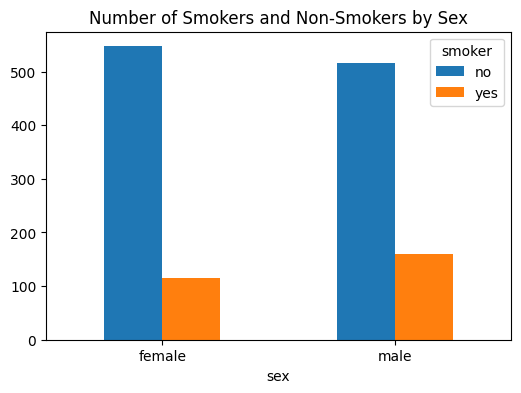

In [25]:
# Quick barplot to see diference in smoking rate between Men and Women
table.plot.bar(figsize = (6, 4), rot = 0)
plt.title('Number of Smokers and Non-Smokers by Sex');

## Q2 Hypothesis Test Result
### Our p-value is only lower by one decimal place, but this is still lower than our threshold of 0.05, and therefore we will reject the null hypothesis that there is no difference in smoking rate between men and women. 

...................................................................................................................................................................................................................................................

### Q3. Do different regions have different charges, on average?
- #### Null Hypothesis:
    - There is no difference in insurance charges in different regions
- #### Alternate Hypothesis:
    - There will be a statistical difference between insurance charges in different regions
- #### Alpha = 0.05
    
#### We will be using an ANOVA Test

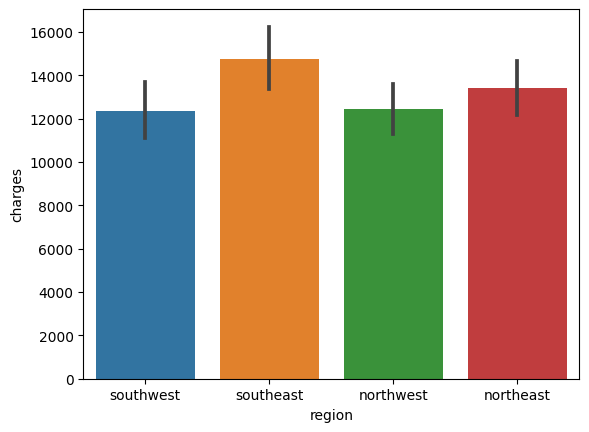

In [26]:
# A visualization of our data distribution before assessing for outliers
sns.barplot(data = df, x = 'region', y = 'charges');

### We need to assess for outliers using Tukey's rule for Outliers
- Tukey's rule states that outliers are those values more than 1.5 times the IQR (Interquartile Range).
- This means values either: 
  - 1.5 times lower than Q1 (Q1 - 1.5IQR)
  - 1.5 times higher than Q3 (Q3 + 1.5IQR)

Therefore, we need to calculate our Q1, Q3, and IQR. Then, we can find our upper and lower limits, and drop outliers outside that range. 

The below code was adapted from: https://www.youtube.com/watch?v=A3gClkblXK8




In [27]:
# Make a copy df as not to alter the original
anova_df = df.copy()

In [28]:
# Calculate Q1 and Q2
Q1 = anova_df.charges.quantile(0.25)
Q3 = anova_df.charges.quantile(0.75)
Q1, Q3

(4746.344, 16657.71745)

In [29]:
# Calculate IQR
IQR = Q3 - Q1
IQR

11911.37345

In [30]:
# Set upper and lower limit
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-13120.716174999998, 34524.777625)

In [31]:
# Now, we will find and list our outliers
anova_df[(anova_df.charges < lower_limit) | (anova_df.charges > upper_limit)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [32]:
anova_no_outliers = anova_df[(anova_df.charges > lower_limit) & (anova_df.charges < upper_limit)]
anova_no_outliers
    # We can see below (from our row count) tha we have eliminated our outliers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Note: This could have been done at the beginning, but it is good to see multiple approaches to dealing with outliers. 
- This would also have eliminated some of the data used in our Chi-Squared test to compare smoking in men and women possibly altering the result

In [33]:
# We need to separate and analyze our groups individually. We have 4 regions
# Regions (as shown in the begining): southeast, southwest, northeast, northwest
regions = {}

# Loop through all unique characteristics
for i in anova_no_outliers['region'].unique():
    data = anova_no_outliers.loc[anova_no_outliers['region'] == i, 'charges'].copy()
    
    # Save results in dictionary
    regions[i] = data
    
regions.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [34]:
# Now, we can assess normality of our regions (groups)
norm_results = {}

for i, data in regions.items():
    stat, p = stats.normaltest(data)
    
    # Append norm_results with p-values, test stats, and size of region group
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat,}
    
# Convert to a DF
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,291.0,1.906636e-16,72.392042
southeast,307.0,1.433158e-11,49.937112
northwest,304.0,6.419143e-13,56.148643
northeast,296.0,3.207934e-10,43.720448


In [35]:
# Check sign (statistical significance) in pandas (more ledgible)
norm_results_df['sig'] = norm_results_df['p'] < 0.05
norm_results_df

,n,p,test stat,sig
southwest,291.0,1.906636e-16,72.392042,True
southeast,307.0,1.433158e-11,49.937112,True
northwest,304.0,6.419143e-13,56.148643,True
northeast,296.0,3.207934e-10,43.720448,True


### We confirm that all regions do NOT have normal distribution. 
- We have large enough groups to ignore the assumption of normality

In [36]:
# Testing groups for equal varience (levene test)
stats.levene(*regions.values())

LeveneResult(statistic=2.73322677477775, pvalue=0.04252872319674293)

### We did not meet the assumption of equal variance, but we can still perform a one-way ANOVA test using the Kruskal-Wallis test (Nonparametric test)



In [37]:
results_anova = stats.kruskal(*regions)
results_anova

KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

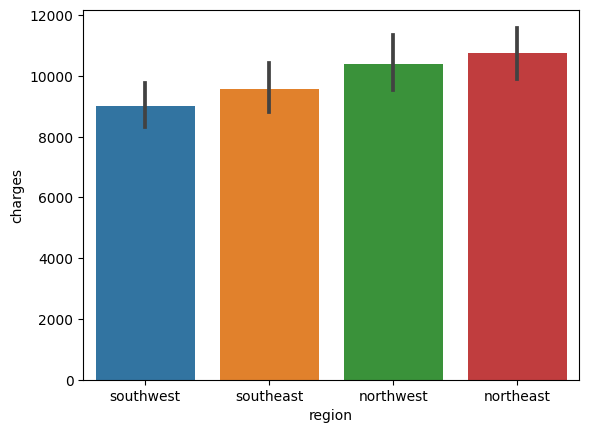

In [38]:
# A quick visualization of our data WITHOUT outliers
sns.barplot(data = anova_no_outliers, x = 'region', y = 'charges');

### Our result is > 0.05, indicating that we should ACCEPT the Null Hypothesis that there is no difference in insurance charges in different regions